#Import Libraries

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#Data Loading

In [91]:
import kagglehub

path = kagglehub.dataset_download("iamsouravbanerjee/analytics-industry-salaries-2022-india")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/analytics-industry-salaries-2022-india


In [92]:
url = '/root/.cache/kagglehub/datasets/iamsouravbanerjee/analytics-industry-salaries-2022-india/versions/14/Partially Cleaned Salary Dataset.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0
...,...,...,...,...,...,...
4334,4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4335,4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4336,4341,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4337,4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0


#EDA

##Deskripsi Variable

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4339 non-null   int64  
 1   Company Name       4339 non-null   object 
 2   Job Title          4339 non-null   object 
 3   Salaries Reported  4339 non-null   int64  
 4   Location           4339 non-null   object 
 5   Salary             4339 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.5+ KB


In [94]:
df.describe()

,Unnamed: 0,Salaries Reported,Salary
count,4339.000000,4339.000000,4.339000e+03
mean,2169.900899,2.777138,1.119885e+06
std,1253.742778,5.148095,4.300905e+06
min,0.000000,1.000000,1.081400e+04
25%,1084.500000,1.000000,4.199380e+05
50%,2169.000000,1.000000,7.062830e+05
75%,3255.500000,3.000000,1.196675e+06
max,4343.000000,105.000000,1.661404e+08


##Menangani Missing Value dan Outlier

In [95]:
salaries_reported = (df['Salaries Reported'] == 0).sum()
salary = (df.Salary == 0).sum()

print("Nilai 0 di kolom Salaries Reported ada: ", salaries_reported)
print("Nilai 0 di kolom Salary ada: ", salary)

Nilai 0 di kolom Salaries Reported ada:  0
Nilai 0 di kolom Salary ada:  0


In [96]:
df.loc[(df['Salary'] == 0)]

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary


In [97]:
df = df.loc[(df[['Unnamed: 0']]!=0).all(axis=1)]

df.shape

(4338, 6)

Text(0.5, 1.0, 'Distribusi Salary Sebelum Transformasi')

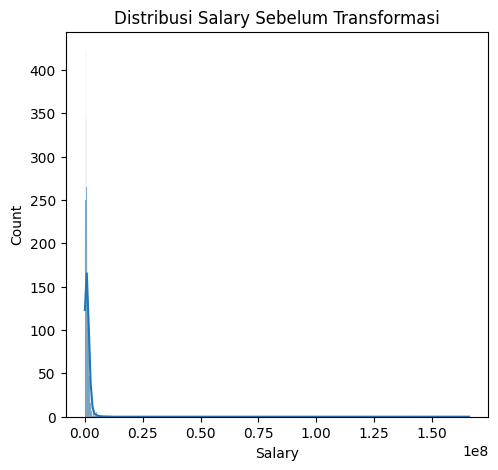

In [98]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde=True)
plt.title('Distribusi Salary Sebelum Transformasi')

In [99]:
df['Salary_Log'] = np.log1p(df['Salary'])  # log1p = log(1+x) untuk menghindari log(0)

<ipython-input-99-62f69c911418>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary_Log'] = np.log1p(df['Salary'])  # log1p = log(1+x) untuk menghindari log(0)


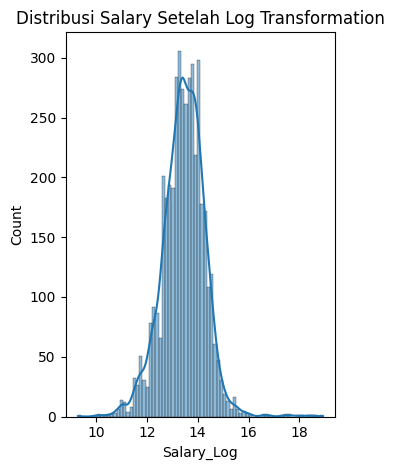

In [100]:
plt.subplot(1, 2, 2)
sns.histplot(df['Salary_Log'], kde=True)
plt.title('Distribusi Salary Setelah Log Transformation')
plt.tight_layout()

<Axes: xlabel='Salary'>

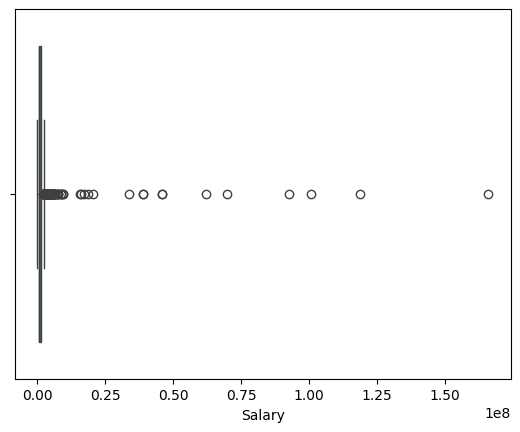

In [101]:
sns.boxplot(x=df['Salary'])

<Axes: xlabel='Salaries Reported'>

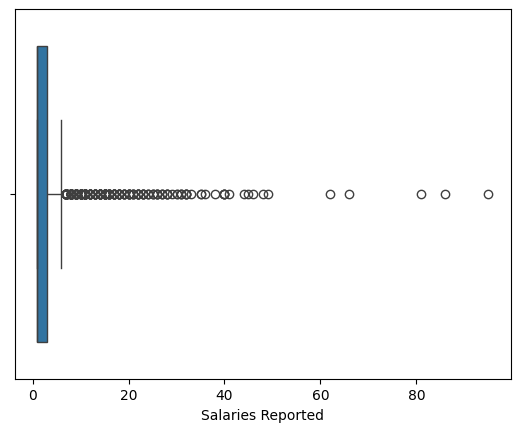

In [102]:
sns.boxplot(x=df['Salaries Reported'])

In [103]:
numeric_col = ['Salaries Reported', 'Salary']

df[numeric_col]

,Salaries Reported,Salary
1,95,1191950.0
2,66,836874.0
3,40,669578.0
4,32,944110.0
5,30,908764.0
...,...,...
4334,1,62160.0
4335,1,751286.0
4336,1,410952.0
4337,1,1612324.0


In [104]:
Q1 = df[numeric_col].quantile(0.10)
Q3 = df[numeric_col].quantile(0.90)

IQR = Q3-Q1
df = df[~((df[numeric_col]<(Q1-2.0*IQR))|(df[numeric_col]>(Q3+2.0*IQR))).any(axis=1)]

In [105]:
df.shape

(4159, 7)

##Univariate Analysis

In [106]:
numerical_features = ['Salaries Reported', 'Salary']
categorical_features = ['Company Name', 'Job Title', 'Location']

###Categorical Features

####Fitur Cut

                 jumlah sampel  persentase
Company Name                              
& Other Stories            NaN         0.0
---                        NaN         0.0
159 Solutions              NaN         0.0
1mg                        NaN         0.0
20K Group                  NaN         0.0
...                        ...         ...
vPhrase                    NaN         0.1
vitrana                    NaN         0.0
wayForward                 NaN         0.0
yellow.ai                  NaN         0.0
Águas Guariroba            NaN         0.0

[2509 rows x 2 columns]


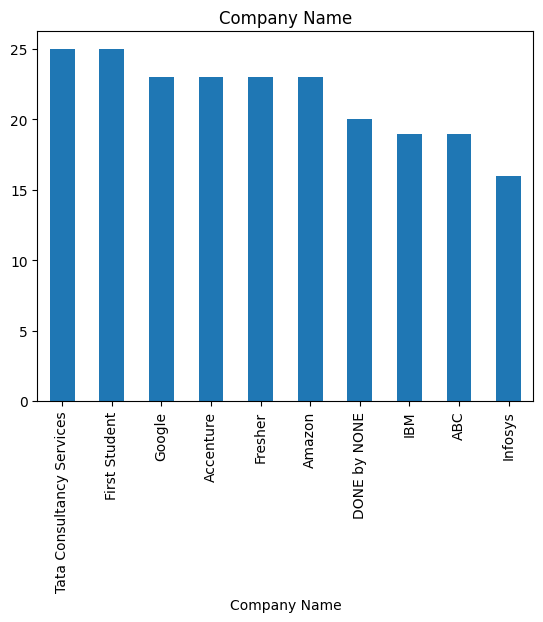

In [107]:
feature = categorical_features[0]
count = df[feature].value_counts().nlargest(10)
percent = 100*df[feature].value_counts(normalize=True)
df_company_name = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_company_name)
count.plot(kind='bar', title=feature);

####Fitur Color

                                      jumlah sampel  persentase
Job Title                                                      
Data Scientist                                 1766        42.5
Data Analyst                                    923        22.2
Data Engineer                                   773        18.6
Machine Learning Engineer                       563        13.5
Data Science                                     43         1.0
Senior Data Scientist                            39         0.9
Junior Data Scientist                            18         0.4
Senior Machine Learning Engineer                  9         0.2
Lead Data Scientist                               6         0.1
Machine Learning Consultant                       2         0.0
Machine Learning Scientist                        2         0.0
Machine Learning Developer                        2         0.0
Software Engineer - Machine Learning              2         0.0
Data Science Manager                    

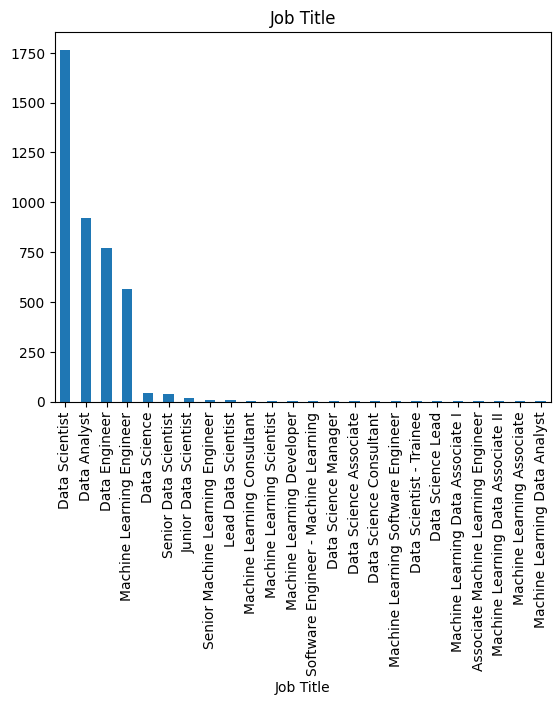

In [108]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_job_title = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_job_title)
count.plot(kind='bar', title=feature);

###Numerical Features

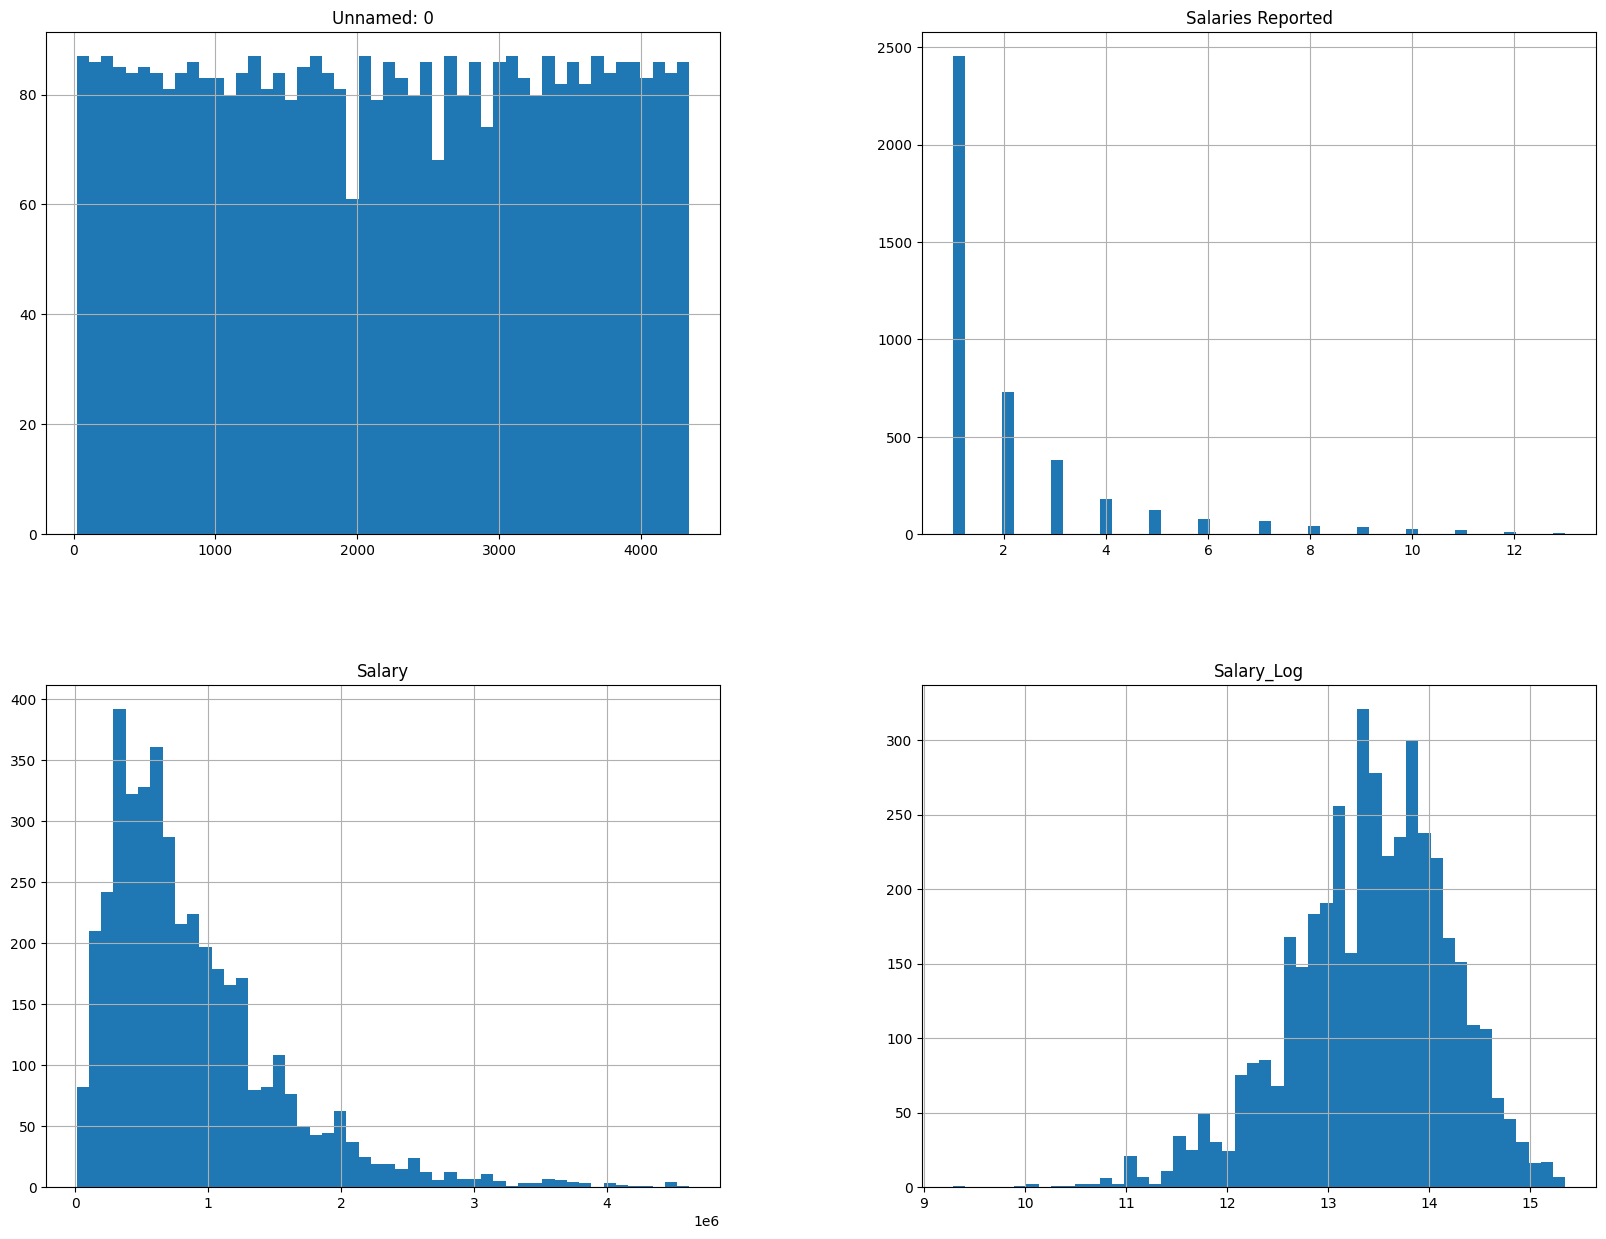

In [109]:
df.hist(bins=50, figsize=(20,15))
plt.show()

##Multivariate Analysis

###Categorical Features

<ipython-input-110-458170ca3aea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Salary", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-110-458170ca3aea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Salary", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-110-458170ca3aea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Salary", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")


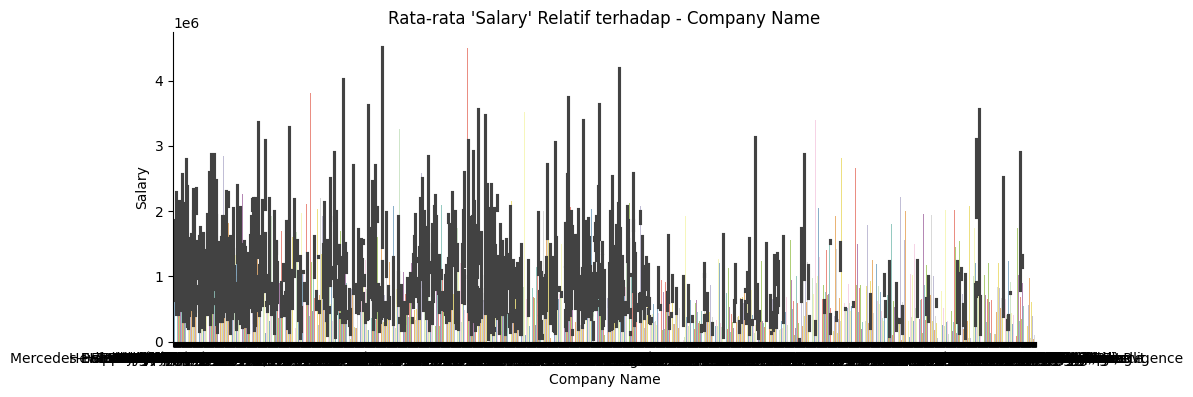

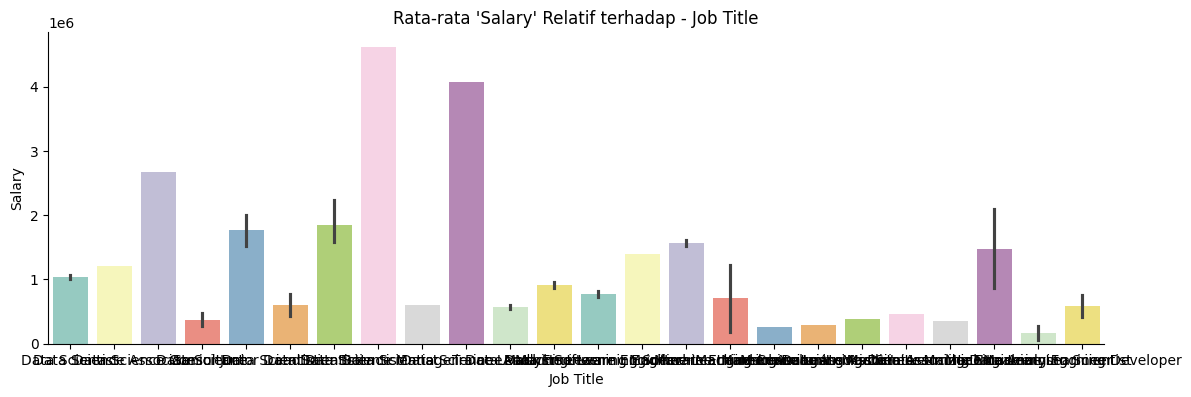

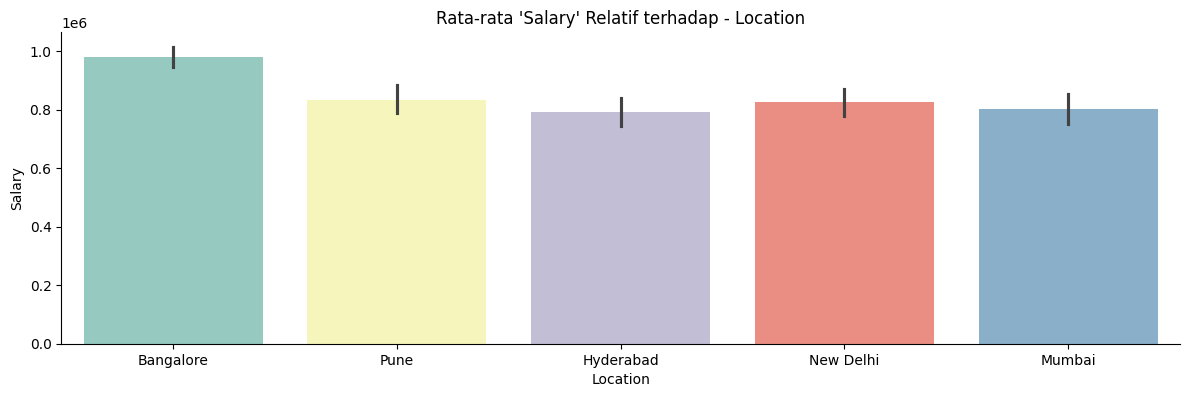

In [110]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Salary", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Salary' Relatif terhadap - {}".format(col))

###Numerical Features

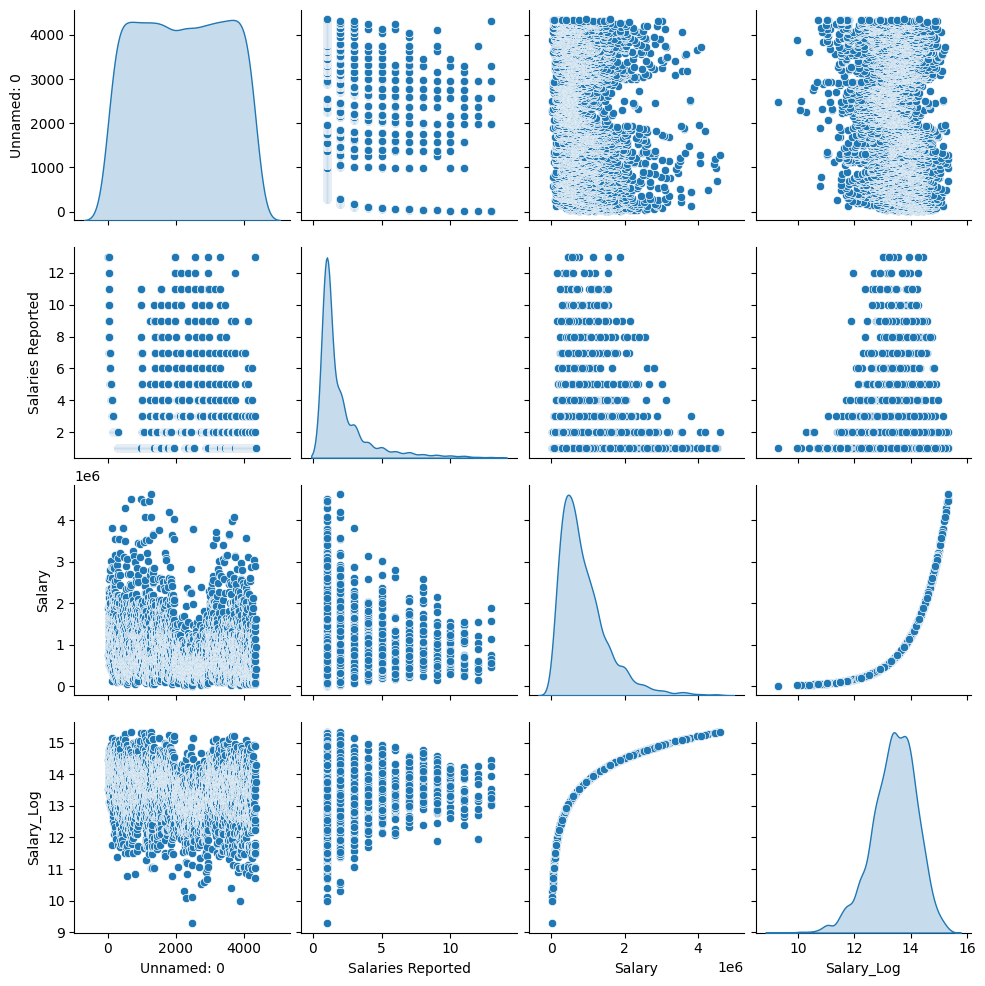

In [111]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

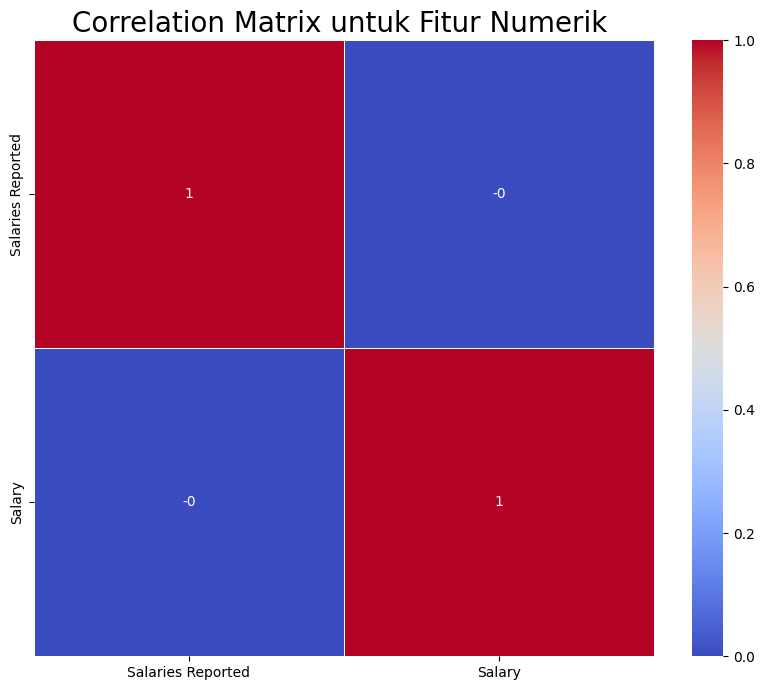

In [112]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [113]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Salary_Log
22,Société Générale,Data Scientist,13,Bangalore,1870000.0,14.441450
23,Flutura,Data Scientist,13,Bangalore,758376.0,13.538936
24,Fuzzy Logix,Data Scientist,13,Bangalore,1556575.0,14.257999
25,DXC Technology,Data Scientist,12,Bangalore,1194327.0,13.993094
26,Jio,Data Scientist,11,Bangalore,1470000.0,14.200774


#Data Preparation

##Encoding Fitur Kategori

In [114]:
def create_target_encoding(df, categorical_col, target_col):
    encoding_map = df.groupby(categorical_col)[target_col].mean().to_dict()
    new_col_name = f'{categorical_col}_target_enc'
    df[new_col_name] = df[categorical_col].map(encoding_map)
    return df, new_col_name

df, company_target_enc = create_target_encoding(df, 'Company Name', 'Salary')

In [115]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['Company Name'], prefix='Company Name')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Job Title'], prefix='Job Title')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Location'], prefix='Location')],axis=1)

df['Salary_per_Report'] = df['Salary'] / (df['Salaries Reported'] + 1)  # +1 untuk menghindari division by zero
df.drop(['Company Name','Job Title','Location'], axis=1, inplace=True)
df.head()

,Salaries Reported,Salary,Salary_Log,Company Name_target_enc,Company Name_& Other Stories,Company Name_---,Company Name_159 Solutions,Company Name_1mg,Company Name_20K Group,Company Name_2COMS,...,Job Title_Machine Learning Software Engineer,Job Title_Senior Data Scientist,Job Title_Senior Machine Learning Engineer,Job Title_Software Engineer - Machine Learning,Location_Bangalore,Location_Hyderabad,Location_Mumbai,Location_New Delhi,Location_Pune,Salary_per_Report
22,13,1870000.0,14.441450,1.365410e+06,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,133571.428571
23,13,758376.0,13.538936,9.310790e+05,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,54169.714286
24,13,1556575.0,14.257999,1.556575e+06,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,111183.928571
25,12,1194327.0,13.993094,8.680587e+05,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,91871.307692
26,11,1470000.0,14.200774,9.234281e+05,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,122500.000000


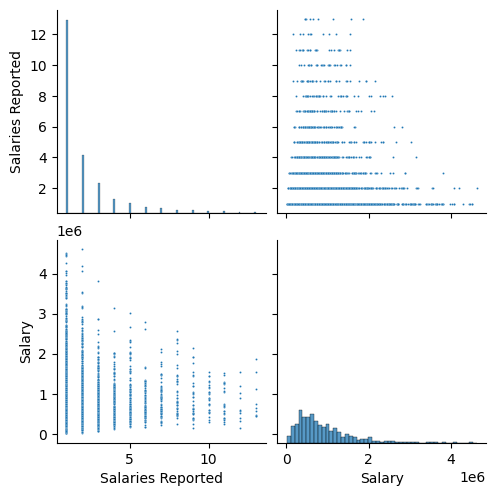

In [116]:
sns.pairplot(df[['Salaries Reported', 'Salary']], plot_kws={"s": 2});

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pca.fit(df[['Salaries Reported']])
princ_comp = pca.transform(df[['Salaries Reported']])

In [118]:
pca.explained_variance_ratio_.round(3)

array([1.])

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['Salaries Reported']])
df['dimension'] = pca.transform(df[['Salaries Reported']]).flatten()
df.drop(['Salaries Reported'], axis=1, inplace=True)

##Train-Test-Split

In [120]:
df.head()

,Salary,Salary_Log,Company Name_target_enc,Company Name_& Other Stories,Company Name_---,Company Name_159 Solutions,Company Name_1mg,Company Name_20K Group,Company Name_2COMS,Company Name_360DigiTMG,...,Job Title_Senior Data Scientist,Job Title_Senior Machine Learning Engineer,Job Title_Software Engineer - Machine Learning,Location_Bangalore,Location_Hyderabad,Location_Mumbai,Location_New Delhi,Location_Pune,Salary_per_Report,dimension
22,1870000.0,14.441450,1.365410e+06,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,133571.428571,10.900938
23,758376.0,13.538936,9.310790e+05,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,54169.714286,10.900938
24,1556575.0,14.257999,1.556575e+06,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,111183.928571,10.900938
25,1194327.0,13.993094,8.680587e+05,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,91871.307692,9.900938
26,1470000.0,14.200774,9.234281e+05,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,122500.000000,8.900938


In [121]:
from sklearn.model_selection import train_test_split

X = df.drop(['Salary', 'Salary_Log'],axis = 1)
y = df['Salary']
y_log = df['Salary_Log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)
_, _, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.1, random_state=123)

In [122]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4159
Total # of sample in train dataset: 3743
Total # of sample in test dataset: 416


##Standarisasi

In [123]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['dimension', 'Salary_per_Report', company_target_enc]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,dimension,Salary_per_Report,Company Name_target_enc
841,-0.551386,-0.308923,-0.691078
1547,-0.551386,0.042092,-0.337072
349,-0.551386,2.292588,2.333847
4313,-0.551386,-0.764640,-0.452439
4057,-0.551386,1.271982,0.231977


In [124]:
X_train[numerical_features].describe().round(4)

,dimension,Salary_per_Report,Company Name_target_enc
count,3743.0000,3743.0000,3743.0000
mean,-0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001
min,-0.5514,-1.0988,-1.6096
25%,-0.5514,-0.6838,-0.6745
50%,-0.5514,-0.3089,-0.1572
75%,-0.0501,0.3523,0.4380
max,5.4642,6.0714,6.6986


#Model Development

##K-Nearest Neighbor

In [125]:
models = pd.DataFrame(index=['train_mse', 'test_mse', 'train_r2', 'test_r2'],
                      columns=['KNN', 'KNN_log', 'RandomForest', 'RandomForest_log', 'Boosting', 'Boosting_log'])

In [126]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
              'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5,
                       scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
knn = knn_grid.best_estimator_
print(f"Best KNN parameters for original target: {knn_grid.best_params_}")

In [127]:
knn = KNeighborsRegressor(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)
models.loc['train_r2','KNN'] = r2_score(y_pred = knn.predict(X_train), y_true=y_train)

In [128]:
knn_log_grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5,
                           scoring='neg_mean_squared_error')
knn_log_grid.fit(X_train, y_log_train)
knn_log = knn_log_grid.best_estimator_
print(f"Best KNN parameters for log target: {knn_log_grid.best_params_}")

knn_log = KNeighborsRegressor(n_neighbors=3, weights='uniform')
knn_log.fit(X_train, y_log_train)
models.loc['train_mse','KNN_log'] = mean_squared_error(y_pred = knn_log.predict(X_train), y_true=y_log_train)
models.loc['train_r2','KNN_log'] = r2_score(y_pred = knn_log.predict(X_train), y_true=y_log_train)

##Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=55), param_grid_rf, cv=5,
                      scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
RF = rf_grid.best_estimator_
print(f"Best RF parameters for original target: {rf_grid.best_params_}")

In [130]:
RF = RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=2, random_state=42)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)
models.loc['train_r2','RandomForest'] = r2_score(y_pred=RF.predict(X_train), y_true=y_train)

In [131]:
rf_log_grid = GridSearchCV(RandomForestRegressor(random_state=55), param_grid_rf, cv=5,
                          scoring='neg_mean_squared_error', n_jobs=-1)
rf_log_grid.fit(X_train, y_log_train)
RF_log = rf_log_grid.best_estimator_
print(f"Best RF parameters for log target: {rf_log_grid.best_params_}")

In [132]:
RF_log = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)
RF_log.fit(X_train, y_log_train)
models.loc['train_mse','RandomForest_log'] = mean_squared_error(y_pred=RF_log.predict(X_train), y_true=y_log_train)
models.loc['train_r2','RandomForest_log'] = r2_score(y_pred=RF_log.predict(X_train), y_true=y_log_train)

<Figure size 1000x600 with 0 Axes>

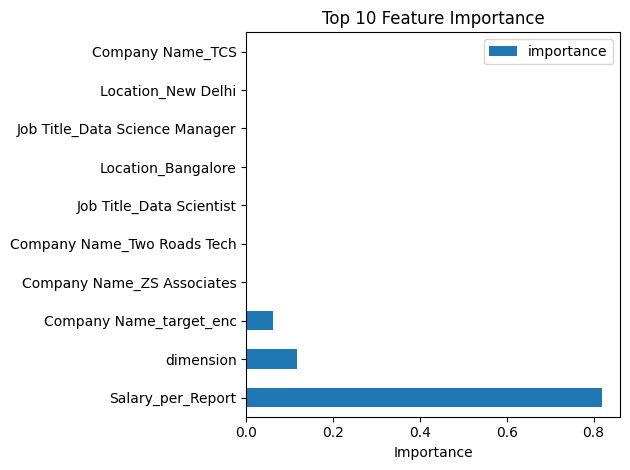

In [133]:
feature_importances = pd.DataFrame(
    RF.feature_importances_,
    index=X_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()

## AdaBoostRegressor

In [134]:
from sklearn.ensemble import AdaBoostRegressor

param_grid_boost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'loss': ['linear', 'square', 'exponential']
}

boost_grid = GridSearchCV(AdaBoostRegressor(random_state=55), param_grid_boost, cv=5,
                         scoring='neg_mean_squared_error')
boost_grid.fit(X_train, y_train)
boosting = boost_grid.best_estimator_
print(f"Best AdaBoost parameters for original target: {boost_grid.best_params_}")

In [135]:
from sklearn.ensemble import AdaBoostRegressor
boosting = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, loss='exponential', random_state=42)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
models.loc['train_r2','Boosting'] = r2_score(y_pred=boosting.predict(X_train), y_true=y_train)

In [136]:
boost_log_grid = GridSearchCV(AdaBoostRegressor(random_state=55), param_grid_boost, cv=5,
                             scoring='neg_mean_squared_error')
boost_log_grid.fit(X_train, y_log_train)
boosting_log = boost_log_grid.best_estimator_
print(f"Best AdaBoost parameters for log target: {boost_log_grid.best_params_}")

In [137]:
boosting_log = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, loss='exponential', random_state=42)
boosting_log.fit(X_train, y_log_train)
models.loc['train_mse','Boosting_log'] = mean_squared_error(y_pred=boosting_log.predict(X_train), y_true=y_log_train)
models.loc['train_r2','Boosting_log'] = r2_score(y_pred=boosting_log.predict(X_train), y_true=y_log_train)

#Evaluasi Model

In [138]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

models.loc['test_mse','KNN'] = mean_squared_error(y_true=y_test, y_pred=knn.predict(X_test))
models.loc['test_r2','KNN'] = r2_score(y_true=y_test, y_pred=knn.predict(X_test))

models.loc['test_mse','KNN_log'] = mean_squared_error(y_true=y_log_test, y_pred=knn_log.predict(X_test))
models.loc['test_r2','KNN_log'] = r2_score(y_true=y_log_test, y_pred=knn_log.predict(X_test))

models.loc['test_mse','RandomForest'] = mean_squared_error(y_true=y_test, y_pred=RF.predict(X_test))
models.loc['test_r2','RandomForest'] = r2_score(y_true=y_test, y_pred=RF.predict(X_test))

models.loc['test_mse','RandomForest_log'] = mean_squared_error(y_true=y_log_test, y_pred=RF_log.predict(X_test))
models.loc['test_r2','RandomForest_log'] = r2_score(y_true=y_log_test, y_pred=RF_log.predict(X_test))

models.loc['test_mse','Boosting'] = mean_squared_error(y_true=y_test, y_pred=boosting.predict(X_test))
models.loc['test_r2','Boosting'] = r2_score(y_true=y_test, y_pred=boosting.predict(X_test))

models.loc['test_mse','Boosting_log'] = mean_squared_error(y_true=y_log_test, y_pred=boosting_log.predict(X_test))
models.loc['test_r2','Boosting_log'] = r2_score(y_true=y_log_test, y_pred=boosting_log.predict(X_test))

In [139]:
def back_transform_log(log_predictions):
    return np.expm1(log_predictions)

model_dict_log = {'KNN_log': knn_log, 'RandomForest_log': RF_log, 'Boosting_log': boosting_log}
model_dict_original = {'KNN': knn, 'RandomForest': RF, 'Boosting': boosting}

compare_df = pd.DataFrame(index=['Original Scale MSE', 'Original Scale R2'],
                         columns=['KNN', 'KNN_log_back', 'RandomForest', 'RandomForest_log_back',
                                 'Boosting', 'Boosting_log_back'])

In [140]:
for name, model in model_dict_original.items():
    y_pred = model.predict(X_test)
    compare_df.loc['Original Scale MSE', name] = mean_squared_error(y_test, y_pred)
    compare_df.loc['Original Scale R2', name] = r2_score(y_test, y_pred)

for name, model in model_dict_log.items():
    y_log_pred = model.predict(X_test)
    y_pred_back = back_transform_log(y_log_pred)
    compare_df.loc['Original Scale MSE', f"{name.split('_')[0]}_log_back"] = mean_squared_error(y_test, y_pred_back)
    compare_df.loc['Original Scale R2', f"{name.split('_')[0]}_log_back"] = r2_score(y_test, y_pred_back)

In [141]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

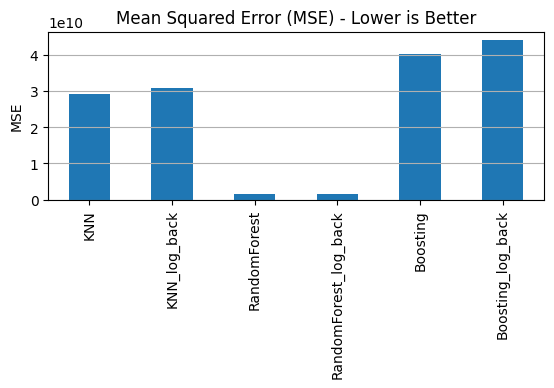

In [142]:
plt.subplot(2, 1, 1)
compare_df.loc['Original Scale MSE'].plot(kind='bar')
plt.title('Mean Squared Error (MSE) - Lower is Better')
plt.ylabel('MSE')
plt.grid(axis='y')

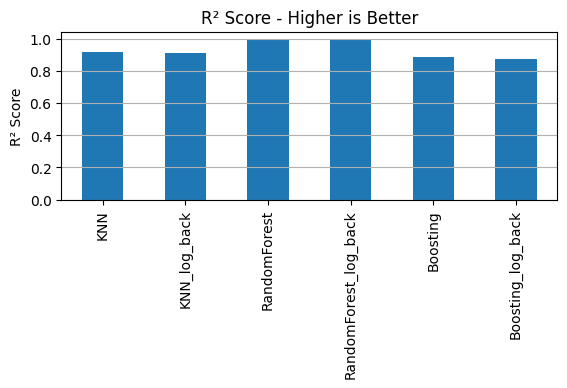

In [143]:
plt.subplot(2, 1, 2)
compare_df.loc['Original Scale R2'].plot(kind='bar')
plt.title('R² Score - Higher is Better')
plt.ylabel('R² Score')
plt.grid(axis='y')

In [144]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [145]:
print("\nPerbandingan Semua Model:")
print(compare_df)

best_model_name = compare_df.loc['Original Scale R2'].idxmax()
print(f"\nModel terbaik berdasarkan R² score: {best_model_name}")
print(f"R² score: {compare_df.loc['Original Scale R2', best_model_name]:.4f}")
print(f"MSE: {compare_df.loc['Original Scale MSE', best_model_name]:.4f}")


Perbandingan Semua Model:
                                   KNN        KNN_log_back      RandomForest  \
Original Scale MSE  29117693866.297268  30725429488.549683  1426569684.13054   
Original Scale R2             0.917184            0.912611          0.995943   

                   RandomForest_log_back            Boosting  \
Original Scale MSE     1458031281.089328  40279791967.614861   
Original Scale R2               0.995853            0.885437   

                     Boosting_log_back  
Original Scale MSE  44260128674.560997  
Original Scale R2             0.874116  

Model terbaik berdasarkan R² score: RandomForest
R² score: 0.9959
MSE: 1426569684.1305


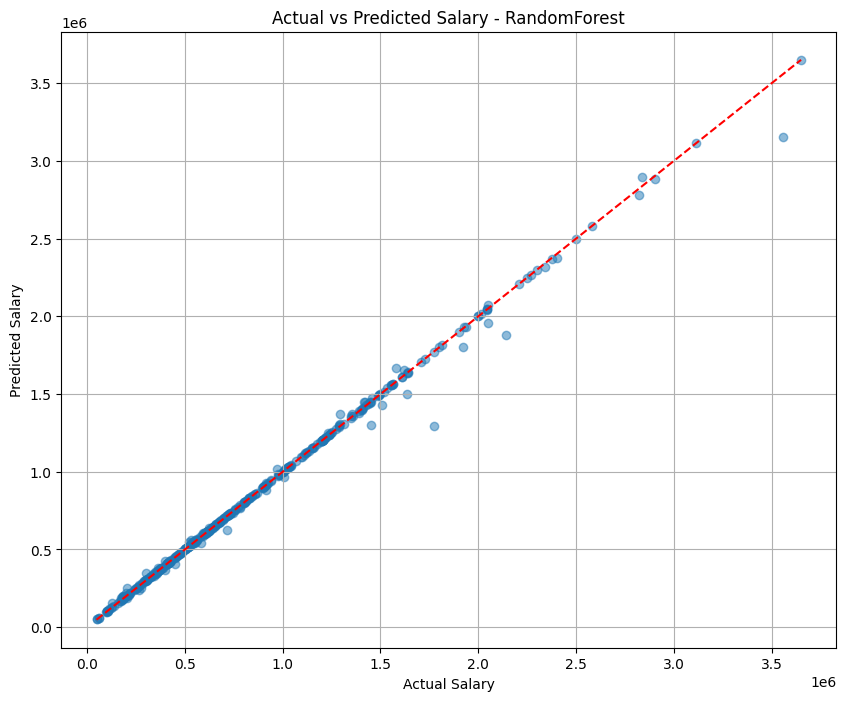

In [146]:
if '_log_back' in best_model_name:
    model_name = best_model_name.split('_')[0]
    model = model_dict_log[f"{model_name}_log"]
    y_log_pred = model.predict(X_test)
    y_pred = back_transform_log(y_log_pred)
else:
    model = model_dict_original[best_model_name]
    y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Actual vs Predicted Salary - {best_model_name}')
plt.grid(True)

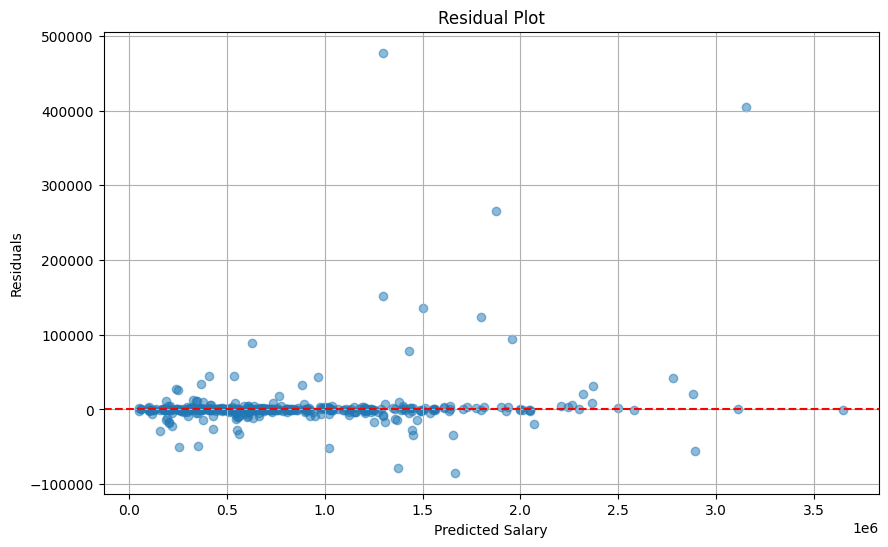

In [147]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

In [148]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict_original.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

In [149]:
for name, model in model_dict_log.items():
    y_log_pred = model.predict(prediksi)
    pred_dict['prediksi_'+name+'_back'] = back_transform_log(y_log_pred).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RandomForest,prediksi_Boosting,prediksi_KNN_log_back,prediksi_RandomForest_log_back,prediksi_Boosting_log_back
1822,977421.0,992795.3,974583.3,968591.5,992443.5,974516.1,931802.1
